# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [2]:
# place your code into this Code cell
df = pd.read_csv("data/database.csv",low_memory=False)

## Data inspection

Here are 5 rows that are selected at random.

In [3]:
df.sample(5)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
102803,267031,2009,8,22,DAL,DELTA AIR LINES,MD-88,A,583,37,...,0,0,0,0,0,0,0,0,0,0
82553,246500,2007,5,2,FDX,FEDEX EXPRESS,MD-11,A,583,39,...,0,0,0,0,0,0,0,0,0,0
93480,257873,2008,8,14,DAL,DELTA AIR LINES,B-737-800,A,148,43,...,0,0,0,0,0,0,0,0,0,0
65077,232742,2004,11,13,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
154985,348941,2014,7,7,ASQ,EXPRESSJET AIRLINES,EMB-145,A,332,14,...,0,0,0,0,0,0,0,0,1,0


Here are all the columns and their datatypes.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In my dataset, some of the really cool and unique features were "Speed", "Species Name", and "Operator". I find it extremely interesting how  people managed to identify exactly which animal had struck them and even managed to measure the speed with which aircraft was travelling when it had been struck by the animal.

In [5]:
df[["Speed","Species Name","Flight Phase","Operator"]].sample(5)


,Speed,Species Name,Flight Phase,Operator
146242,NaN,UNKNOWN BIRD,LANDING ROLL,PSA AIRLINES
42680,NaN,UNKNOWN MEDIUM BIRD,NaN,CONTINENTAL AIRLINES
46154,NaN,MOURNING DOVE,NaN,UNKNOWN
117772,NaN,UNKNOWN BIRD,LANDING ROLL,HORIZON AIR
43618,NaN,HAWK,TAKEOFF RUN,PRIVATELY OWNED


## Data munging

As can be seen from the df.info, the dataset has 66 columns and some of these columns are not particularly interesting. Instead, I decided to first modify the dataset so that we would be dealing with columns that were somewhat interesting and would provide some cool and insightful analysis. I decided the most important columns were:
1. Incident Year
2. Incident Month 
3. Incident Day
4. Operator
5. Airport
6. State
7. Flight Phase
8. Height
9. Species Name 
10. Speed
10. Aircraft Damage


### Munge 1: Modifying Dataframe so that it contains only the most interesting and insightful columns

Here is how the data looked before: 


In [6]:
df.sample(5)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
9726,102189,1993,9,26,UAL,UNITED AIRLINES,B-737,A,148,95,...,0,0,0,0,0,0,0,0,0,0
78919,245946,2006,9,24,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
112960,305926,2010,8,27,SKW,SKYWEST AIRLINES,CRJ100/200,A,188,10,...,0,0,0,0,0,0,0,0,0,0
103957,268557,2009,9,19,BUS,BUSINESS,GLOBAL EXPRS,A,NaN,NaN,...,0,0,0,0,0,0,1,1,0,0
58789,230141,2004,2,11,UAL,UNITED AIRLINES,B-737-300,A,148,24,...,0,0,0,0,0,0,0,0,1,0


Here is how the data looks now

In [7]:
df = df[["Incident Year","Incident Month","Incident Day","Operator","Airport","State","Flight Phase","Height","Species Name","Speed","Aircraft Damage"]]
df

,Incident Year,Incident Month,Incident Day,Operator,Airport,State,Flight Phase,Height,Species Name,Speed,Aircraft Damage
0,1990,1,1,DELTA AIR LINES,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,CLIMB,NaN,GULL,NaN,1
1,1990,1,1,HAWAIIAN AIR,LIHUE ARPT,HI,TAKEOFF RUN,0.0,HOUSE SPARROW,NaN,0
2,1990,1,2,UNKNOWN,LIHUE ARPT,HI,NaN,NaN,BARN OWL,NaN,0
3,1990,1,3,MILITARY,MYRTLE BEACH INTL,SC,APPROACH,200.0,UNKNOWN MEDIUM BIRD,138.0,0
4,1990,1,3,MILITARY,JACKSONVILLE INTL,FL,CLIMB,100.0,FINCH,200.0,0
...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,30,SOUTHWEST AIRLINES,NaN,NaN,NaN,NaN,UNKNOWN SMALL BIRD,NaN,0
174100,2015,9,30,SOUTHWEST AIRLINES,DALLAS LOVE FIELD ARPT,TX,APPROACH,5000.0,UNKNOWN SMALL BIRD,250.0,0
174101,2015,9,30,BUSINESS,MIAMI INTL,FL,CLIMB,3000.0,TURKEY VULTURE,200.0,1
174102,2015,9,30,HORIZON AIR,PORTLAND INTL (OR),OR,DESCENT,6000.0,HERMIT THRUSH,NaN,0


### Munge 2: Removing Rows with missing and unknown values

If we look above, we can see that certain rows such as Index 2, don't have a value for flight phase or height. It is best to remove rows with missing values for two reasons. Firstly, when we conduct data Analysis later onwards it will negatively impact the data and cause systematic errors in statistical calculations. Secondly, by removing these rows, our data will become more insightful and easier to analyse. Next, I want to remove rows in which the value is NaN or Unknown. 

Here is how the data looks now

In [8]:
df = df.dropna()
df = df.drop(df[df["Species Name"]=="UNKNOWN MEDIUM BIRD"].index)
df = df.drop(df[df["Species Name"]=="UNKNOWN SMALL BIRD"].index)
df = df.drop(df[df["Species Name"]=="UNKNOWN LARGE BIRD"].index)
df = df.drop(df[df["Species Name"]=="UNKNOWN BIRD"].index)

df.reset_index(drop=True) 

,Incident Year,Incident Month,Incident Day,Operator,Airport,State,Flight Phase,Height,Species Name,Speed,Aircraft Damage
0,1990,1,3,MILITARY,JACKSONVILLE INTL,FL,CLIMB,100.0,FINCH,200.0,0
1,1990,1,8,1US AIRWAYS,ORLANDO INTL,FL,APPROACH,60.0,GULL,150.0,0
2,1990,1,11,BUSINESS,JOHN C TUNE ARPT,TN,TAKEOFF RUN,0.0,WHITE-TAILED DEER,100.0,1
3,1990,1,11,MILITARY,FORT SMITH REGIONAL ARPT,AR,CLIMB,1400.0,HORNED LARK,200.0,0
4,1990,1,11,SOUTHWEST AIRLINES,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,LA,TAKEOFF RUN,0.0,ROCK PIGEON,140.0,1
...,...,...,...,...,...,...,...,...,...,...,...
26890,2015,9,30,AMERICAN AIRLINES,CHARLOTTE/DOUGLAS INTL ARPT,NC,APPROACH,300.0,CHIMNEY SWIFT,145.0,0
26891,2015,9,30,BUSINESS,CENTENNIAL ARPT,CO,APPROACH,10.0,ROCK PIGEON,10.0,0
26892,2015,9,30,AMERICAN AIRLINES,CHARLOTTE/DOUGLAS INTL ARPT,NC,CLIMB,5500.0,INDIGO BUNTING,250.0,0
26893,2015,9,30,SOUTHWEST AIRLINES,EPPLEY AIRFIELD,NE,LANDING ROLL,0.0,BARN SWALLOW,110.0,0


### Munge 3: Creating a date column

I also thought it would be pretty useful if I had a date column in the format yyyy-mm-dd. This way I could plot time series data or see how the data varies with time. So I created a new Incident Date column which has date-time data type

In [9]:
df["Incident Month"] = np.where(df["Incident Month"].astype(int)<10,"0"+df["Incident Month"].astype(str),df["Incident Month"])
df["Incident Day"] = np.where(df["Incident Day"].astype(int)<10,"0"+df["Incident Day"].astype(str),df["Incident Day"])

df["Incident Date"] = df["Incident Year"].astype(str) + df["Incident Month"].astype(str) + df["Incident Day"].astype(str)
df["Incident Date"] = df["Incident Date"].astype("datetime64")

df = df[["Incident Date","Incident Year","Incident Month","Incident Day","Operator","Airport","State","Flight Phase","Height","Species Name","Speed","Aircraft Damage"]]
df=df.reset_index(drop=True) 

Here is how the final data representation looks:

In [10]:
df

,Incident Date,Incident Year,Incident Month,Incident Day,Operator,Airport,State,Flight Phase,Height,Species Name,Speed,Aircraft Damage
0,1990-01-03,1990,01,03,MILITARY,JACKSONVILLE INTL,FL,CLIMB,100.0,FINCH,200.0,0
1,1990-01-08,1990,01,08,1US AIRWAYS,ORLANDO INTL,FL,APPROACH,60.0,GULL,150.0,0
2,1990-01-11,1990,01,11,BUSINESS,JOHN C TUNE ARPT,TN,TAKEOFF RUN,0.0,WHITE-TAILED DEER,100.0,1
3,1990-01-11,1990,01,11,MILITARY,FORT SMITH REGIONAL ARPT,AR,CLIMB,1400.0,HORNED LARK,200.0,0
4,1990-01-11,1990,01,11,SOUTHWEST AIRLINES,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,LA,TAKEOFF RUN,0.0,ROCK PIGEON,140.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26890,2015-09-30,2015,09,30,AMERICAN AIRLINES,CHARLOTTE/DOUGLAS INTL ARPT,NC,APPROACH,300.0,CHIMNEY SWIFT,145.0,0
26891,2015-09-30,2015,09,30,BUSINESS,CENTENNIAL ARPT,CO,APPROACH,10.0,ROCK PIGEON,10.0,0
26892,2015-09-30,2015,09,30,AMERICAN AIRLINES,CHARLOTTE/DOUGLAS INTL ARPT,NC,CLIMB,5500.0,INDIGO BUNTING,250.0,0
26893,2015-09-30,2015,09,30,SOUTHWEST AIRLINES,EPPLEY AIRFIELD,NE,LANDING ROLL,0.0,BARN SWALLOW,110.0,0


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

This shows the number of wildlife strikes each Aircrat Operator experienced. I have chosen to display the 15 aircrafts which have witnessed the most wildlife  strikes

In [11]:
df.groupby(by="Operator")["Operator"].count().sort_values(ascending=False).head(15)

Operator
BUSINESS                   4614
SOUTHWEST AIRLINES         2882
AMERICAN AIRLINES          2177
MILITARY                   1484
1US AIRWAYS                1325
DELTA AIR LINES            1286
PRIVATELY OWNED             919
UNITED AIRLINES             787
AMERICAN EAGLE AIRLINES     716
JETBLUE AIRWAYS             596
SKYWEST AIRLINES            569
NORTHWEST AIRLINES          399
US AIRWAYS                  398
HAWAIIAN AIR                396
FEDEX EXPRESS               383
Name: Operator, dtype: int64

This shows how many times each species has struck an aircraft. I have chosen to display the 15 species which have expeirenced the most collisions with aircrafts

In [12]:
df.groupby(by="Species Name")["Species Name"].count().sort_values(ascending=False).head(15)
#shows the top 15 species involved in aircraft strikes.

Species Name
GULL                 3823
SPARROW              1573
MOURNING DOVE        1511
EUROPEAN STARLING    1301
ROCK PIGEON          1004
BLACKBIRD             961
CANADA GOOSE          920
BARN SWALLOW          904
HAWK                  748
KILLDEER              667
RED-TAILED HAWK       615
AMERICAN KESTREL      571
HORNED LARK           557
DUCK                  485
SWALLOW               483
Name: Species Name, dtype: int64

This shows how many times each species, which has caused Aircraft Damage, has struck the plane. 

In [13]:
df[df["Aircraft Damage"]==1].groupby(by="Species Name")["Aircraft Damage"].count().sort_values(ascending=False).head(15) 

Species Name
GULL                  746
CANADA GOOSE          530
WHITE-TAILED DEER     327
TURKEY VULTURE        201
RED-TAILED HAWK       195
HAWK                  178
DUCK                  167
ROCK PIGEON           160
GEESE                 129
NEW WORLD VULTURES    116
MOURNING DOVE         113
MALLARD               112
EUROPEAN STARLING      90
RING-BILLED GULL       75
HERRING GULL           66
Name: Aircraft Damage, dtype: int64

This displays the average speed at which the aircraft was travelling when it hit each of the respective species. I have decided to display the top 15 results of this search.

In [14]:
df.groupby(by="Species Name")["Speed"].mean().sort_values(ascending=False).head(15)

Species Name
LONG-BILLED CURLEW          290.000000
LEAST FLYCATCHER            265.000000
POCKETED FREE-TAILED BAT    250.000000
NORTHERN SAW-WHET OWL       250.000000
SPOTTED TOWHEE              240.000000
LESSER YELLOWLEGS           240.000000
PACIFIC-SLOPE FLYCATCHER    236.666667
GRAY-CHEEKED THRUSH         235.000000
PAINTED BUNTING             230.000000
GRAY FLYCATCHER             225.000000
VIRGINIA RAIL               225.000000
SOLITARY SANDPIPER          220.000000
CASSIN'S VIREO              220.000000
COMMON MOORHEN              220.000000
COMMON TERN                 220.000000
Name: Speed, dtype: float64

This shows the total amount of collisions experienced at each Flight Phase. I have decided to display the top 15 results of this search.

In [15]:
df.groupby(by="Flight Phase")["Flight Phase"].count().sort_values(ascending=False).head(15)

Flight Phase
APPROACH        10870
LANDING ROLL     5664
TAKEOFF RUN      5091
CLIMB            4803
DESCENT           339
TAXI               70
PARKED             34
LOCAL              14
LANDING            10
Name: Flight Phase, dtype: int64

This shows the total amount of collisions experienced each Year. I have decided to display the top 15 results of this search.

In [16]:
df.groupby(by="Incident Year")["Incident Year"].count().sort_values(ascending=False)

Incident Year
2013    1603
2014    1573
2012    1523
2011    1517
2010    1475
2009    1286
2015    1183
2002    1060
2003    1059
2006    1031
2005    1021
2008     972
2007     958
2000     944
2004     925
2001     911
1991     853
1998     836
1994     832
1993     814
1999     790
1992     781
1997     769
1995     762
1996     752
1990     665
Name: Incident Year, dtype: int64

I wanted to investigate whether the speed of the aircraft made it more or less likely to cause damage to the aircraft. 
In order to do this, I made two new dataframes. high_speed_df and low_speed_df. high_speed_df had only those entries with a speed greater of 100 mph. low_speed_df had only those entries with a speed lesser than 100 mph.

In [17]:
high_speed_df = df [ df["Speed"]>=100]
low_speed_df = df [ df["Speed"]<100]
print("The total amount of times aircraft damage was caused in high speed instances was", high_speed_df["Aircraft Damage"].sum())
print("The total amount of times aircraft damage was caused in low speed instances was", low_speed_df["Aircraft Damage"].sum())

The total amount of times aircraft damage was caused in high speed instances was 3602
The total amount of times aircraft damage was caused in low speed instances was 1102


I then conducted the same investigation with Height of the airplane.

In [18]:
high_df = df [ df["Height"]>=10000]
low_df = df [ df["Height"]<10000]
print("The total amount of times aircraft damage was caused in high altitude instances was", high_df["Aircraft Damage"].sum())
print("The total amount of times aircraft damage was caused in low altitude instances was", low_df["Aircraft Damage"].sum())

The total amount of times aircraft damage was caused in high altitude instances was 26
The total amount of times aircraft damage was caused in low altitude instances was 4678


For my own curiosity, I wanted to see:
1. the highest altitude at which a collision took place. 
2. the fastest an airplane was travelling when struck by an animal. 


In [19]:
print("The highest altitude at which a collision took place was ", df["Height"].max(), "feet")
print("The fastest an airplane was travelling when struck by an animal was ", df["Speed"].max(),"mph")
max_height_df = df[df["Height"]== df["Height"].max()]
max_speed_df = df [df["Speed"]==df["Speed"].max()]

The highest altitude at which a collision took place was  20000.0 feet
The fastest an airplane was travelling when struck by an animal was  2500.0 mph


Here is the entry corresponding to the highest crash:

In [20]:
max_height_df

,Incident Date,Incident Year,Incident Month,Incident Day,Operator,Airport,State,Flight Phase,Height,Species Name,Speed,Aircraft Damage
26567,2015-08-08,2015,08,08,BUSINESS,CUYAHOGA COUNTY ARPT,OH,DESCENT,20000.0,LESSER YELLOWLEGS,260.0,1


Here is the entry corresponding to the fastest crash:

In [21]:
max_speed_df

,Incident Date,Incident Year,Incident Month,Incident Day,Operator,Airport,State,Flight Phase,Height,Species Name,Speed,Aircraft Damage
14615,2006-10-13,2006,10,13,MILITARY,HARRISBURG INTL,PA,CLIMB,180.0,SWALLOW,2500.0,0


## Data visualization

This graph displays the total wildlife Aircraft strikes which took place every year

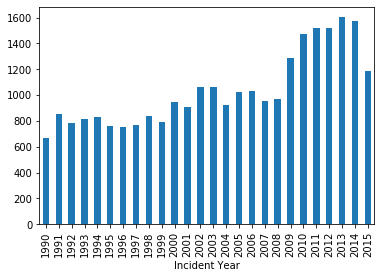

In [22]:
df_to_plot = df[["Incident Year","Incident Day"]].groupby(by=['Incident Year']).aggregate({'count'})
df_to_plot.plot.bar(legend=False)

This graph displays the average speed with which each species stuck an airplane. I have decided to graph the top 15 highest results

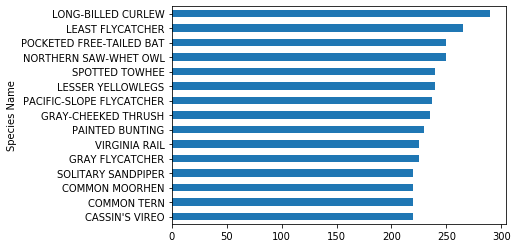

In [23]:
df_to_plot = df[["Species Name","Speed"]].groupby(by=['Species Name']).aggregate({'mean'})
df_to_plot = df_to_plot.sort_values(by=('Speed',"mean"), ascending=False)
df_to_plot[:15][::-1].plot.barh(y=['Speed'],legend=False)

This graph displays the distribution of wildlife strikes, according to the Flight Phase.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f7c9110>],
      dtype=object)

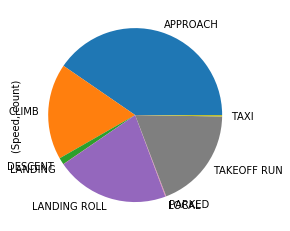

In [24]:
df_to_plot= df[["Flight Phase","Speed"]].groupby(by=['Flight Phase']).aggregate({'count'})
df_to_plot.plot.pie(subplots=True,legend=False)

This graph displays the distribution of animals which have struck airplanes. 

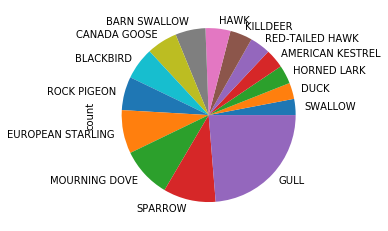

In [25]:
df_to_plot = df[["Species Name","Speed"]].groupby(by=['Species Name']).aggregate({'count'})
df_to_plot = df_to_plot.sort_values(by=('Speed',"count"), ascending=False)
df_to_plot[:15][::-1].plot.pie(y="Speed",legend=False)

This graph displays the number of strikes which had aircraft damage each year

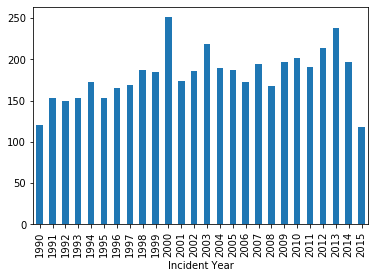

In [26]:
df_to_plot = df[["Incident Year","Aircraft Damage"]].groupby(by=['Incident Year']).aggregate({'sum'})
df_to_plot.plot.bar(legend=False)